In [13]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  


Text(0.5, 1.0, 'SVM Decision Region Boundary')

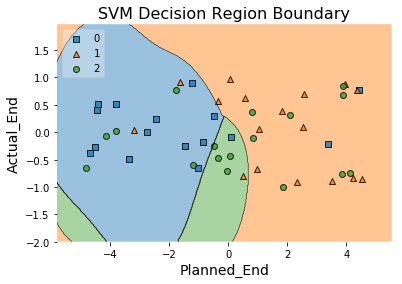

In [38]:
### code base from an example from
# https://stackoverflow.com/questions/43284811/plot-svm-with-matplotlib
# Create arbitrary dataset for example
df = pd.DataFrame({'Planned_End': np.random.uniform(low=-5, high=5, size=50),
                   'Actual_End':  np.random.uniform(low=-1, high=1, size=50),
                   'Late':        np.random.random_integers(low=0,  high=2, size=50)}
)

# Fit Support Vector Machine Classifier
X = df[['Planned_End', 'Actual_End']]
y = df['Late']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [170]:
#training data in quadrants 2 and 4
#large improvement with svm when test data was linearly bounded 
    #however, results are very dependent upon how training data is distributed
x_1 = list(np.random.uniform(low=-5, high=-2, size=25))
y_1 = list(np.random.uniform(low=2, high=5, size=25))
x_1.extend(list(np.random.uniform(low=2, high=5, size=25)))
y_1.extend(list(np.random.uniform(low=-5, high=-2, size=25)))

In [166]:
#training data uniform 
x_1 = np.random.uniform(low=-5, high=5, size=50)
y_1 = np.random.uniform(low=-5, high=5, size=50)

In [129]:
#training data bounded between two lines
def data_lin_bound(x_values):
    y_values = []
    intercept = 1
    for i in range(len(x_values)):
        x = x_values[i]
        low_x = x - intercept
        high_x = x + intercept
        y = np.random.uniform(low=low_x, high=high_x, size=1)[0]
        y_values.append(y)
    return y_values

x_1 = list(np.random.uniform(low=-5, high=5, size=50))
y_1 = data_lin_bound(x_1)

accuracy of Perceptron on training data for 50 training data points: 100.0%
accuracy of linear svm on training data for 50 training data points: 100.0%
accuracy of Perceptron on test data over 10 sets of 100 data points: 59.9%
accuracy of linear svm on test data over 10 sets of 100 data points: 86.95%


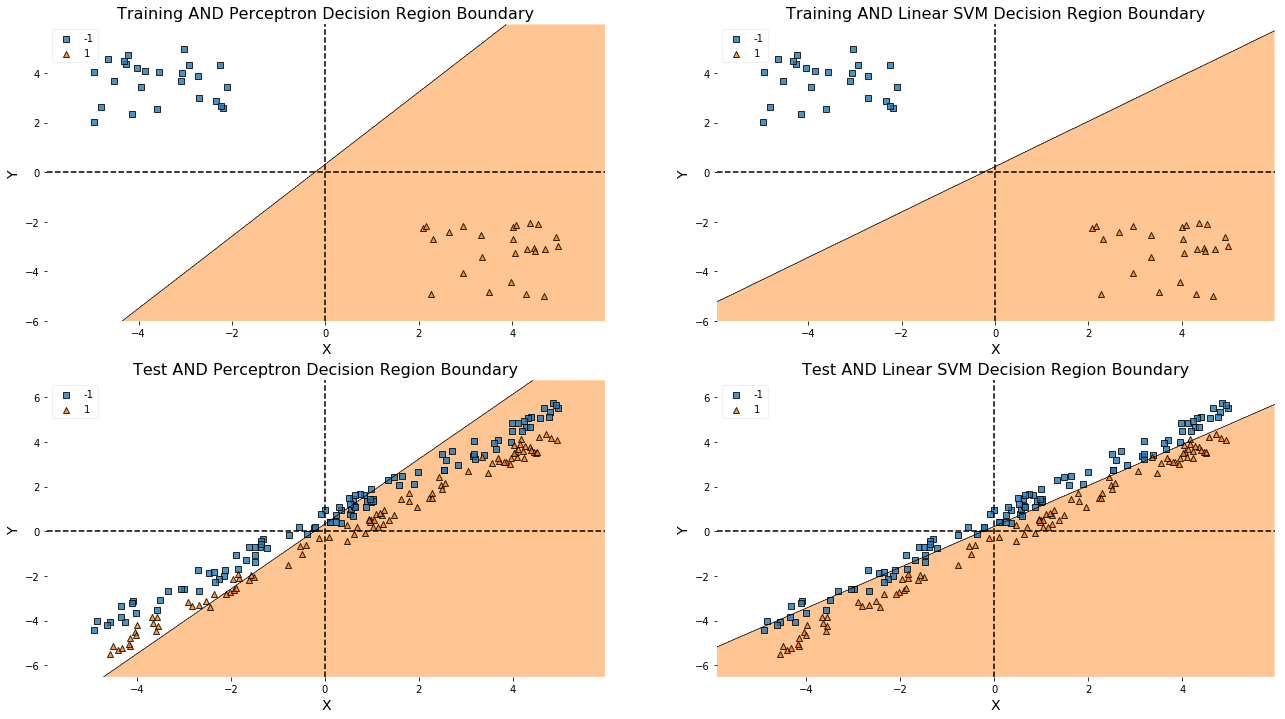

In [173]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

test_data_size = 200

gaussian_x_loc = 0
gaussian_y_loc = 0
gaussian_x_scale = 2.5
gaussian_y_scale = 1.5

percep_avg_train = 0
percep_avg_test = 0

svm_avg_train = 0
svm_avg_test = 0

trials = 10


and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']

clf_perceptron = Perceptron(tol=1e-3, random_state=0)
clf_perceptron.fit(X.values, y.values) 
clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
clf_linear_svm.fit(X.values, y.values)

percep_avg_train = (clf_perceptron.score(X.values, y.values))
svm_avg_train = (clf_linear_svm.score(X.values, y.values))

for _ in range(trials):

    #test from uniform dataset
    #x_test = np.random.uniform(low=-5, high=5, size=test_data_size)
    #y_test = np.random.uniform(low=-5, high=5, size=test_data_size)

    #gaussian datasets
    #test from gaussian dataset
    #x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
    #y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
    
    
    #linear bound datasets
    x_test = np.random.uniform(low=-5, high=5, size=test_data_size)
    y_test = data_lin_bound(x_test)

    and_df_test = pd.DataFrame({'X': x_test,
                           'Y': y_test})
    and_df_test['Label'] = and_label(and_df_test)

    X_test = and_df_test[['X', 'Y']]
    y_test = and_df_test['Label']

    
    percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
    svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

plt.figure(figsize=(22,12))

#plot perceptron training data
plt.subplot(2, 2, 1)
plot_decision_regions(X=X.values, y=y.values, clf=clf_perceptron, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Training AND Perceptron Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

#plot linear svm training data
plt.subplot(2, 2, 2)
plot_decision_regions(X=X.values, y=y.values, clf=clf_linear_svm, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Training AND Linear SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

#plot perceptron test data
plt.subplot(2, 2, 3)
plot_decision_regions(X=X_test.values, y=y_test.values, clf=clf_perceptron, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Test AND Perceptron Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

#plot linear svm test data
plt.subplot(2, 2, 4)
plot_decision_regions(X=X_test.values, y=y_test.values, clf=clf_linear_svm, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Test AND Linear SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

print("accuracy of Perceptron on training data for 50 training data points: " + str(100*percep_avg_train) + "%")
print("accuracy of linear svm on training data for 50 training data points: " + str(100*svm_avg_train) + "%")

print("accuracy of Perceptron on test data over " + str(trials) + " sets of 100 data points: " + str(100*percep_avg_test/trials) + "%")
print("accuracy of linear svm on test data over " + str(trials) + " sets of 100 data points: " + str(100*svm_avg_test/trials) + "%")


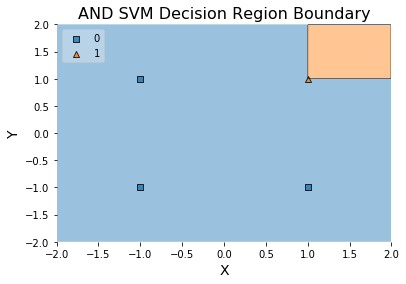

In [76]:
### And with simple data
and_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [1, 0, 0, 0]})

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.show()

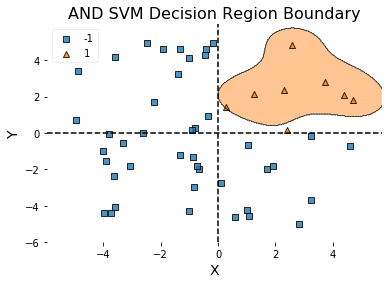

In [54]:
### And with random data
def and_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 and df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

and_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
and_df['Label'] = and_label(and_df)

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

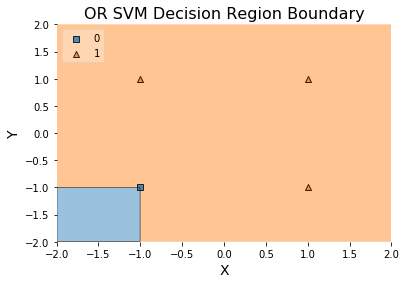

array([1, 1, 0, 1], dtype=int64)

In [57]:
### Or with simple data
or_df = pd.DataFrame({'X': [1, 1, -1, -1],
                      'Y': [1, -1, -1, 1]  ,
                  'Label': [1, 1, 0, 1]})

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.show()
y.values

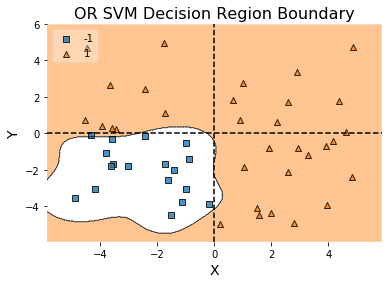

In [58]:
### Or with random data
def or_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 or df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

or_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
or_df['Label'] = or_label(or_df)

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

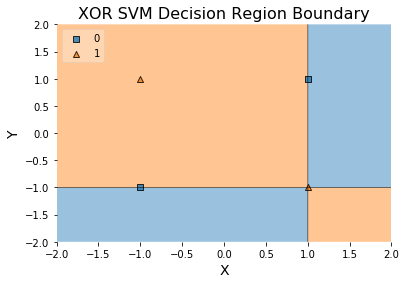

In [7]:
xor_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [0, 1, 0, 1]})

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.show()

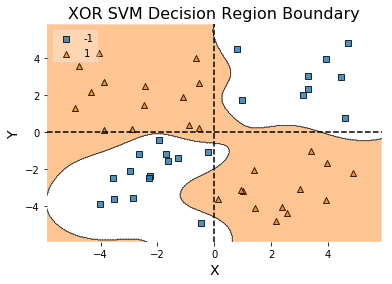

In [5]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()